In [ ]:
# Analyze stocks holding distribution. Add up position series for each stock by date

In [ ]:
# Analyze each stock's return

In [ ]:
# 

In [3]:
import pandas as pd
import yfinance as yf
import numpy as np
from pylab import plt
from MALongPattern import MALongPattern as MALP

In [4]:
stock_list = ['AAPL', 'MSFT', 'TSLA', 'AMD']

In [31]:
df_position = pd.DataFrame(columns = stock_list)
df_return = pd.DataFrame(columns = stock_list)
df_strategy = pd.DataFrame(columns = stock_list)

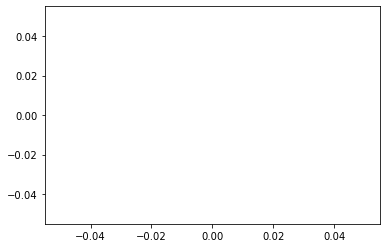

In [26]:
plt.plot(df_position.index, df_position.total)

In [32]:
def get_datas(startdate, enddate, amount, tc):
    for ticker in stock_list:
        strategy = MALP(ticker, startdate, enddate, amount, tc)
        strategy.run_strategy()
        df_position[ticker] = strategy.results['position']
        df_position.fillna(0, inplace = True)
        df_strategy[ticker] = strategy.results['strategy']
        df_return[ticker] = strategy.results['return']        

In [33]:
start = '2010-1-1'
end = '2021-4-16'
t = 0.0
amnt = 10000
get_datas(start, end, amnt, t)


C:\Users\fire_\Python\QuantUnicorn\MALongPattern.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  np.log(data['exitPrice'][sells] / data['Close'].shift(1)[sells])
C:\Users\fire_\Python\QuantUnicorn\MALongPattern.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['position'][sells] = 1
C:\Users\fire_\Python\QuantUnicorn\MALongPattern.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['strategy'][sells] -= self.tc


In [34]:
df_position['total'] = df_position.sum(axis=1)

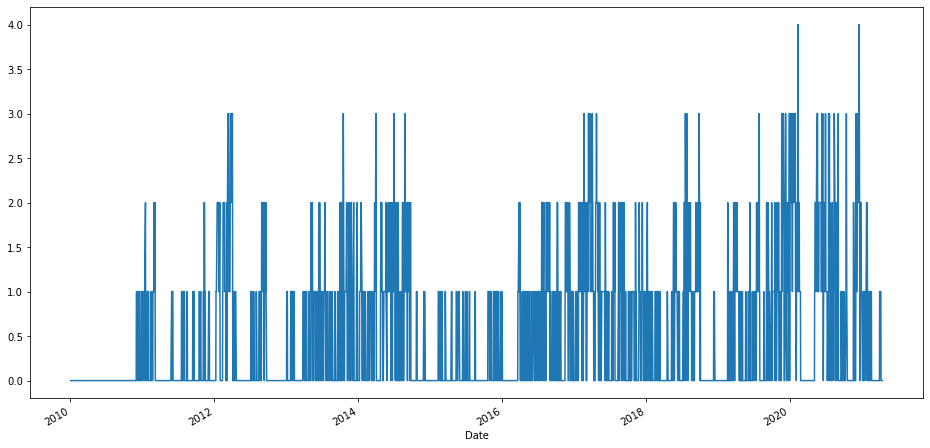

In [39]:
df_position['total'].plot(figsize=(16,8))

In [38]:
df_position[df_position['total'] == 0]

,AAPL,MSFT,TSLA,AMD,total
Date,,,,,
2010-01-04,0,0,0.0,0,0.0
2010-01-05,0,0,0.0,0,0.0
2010-01-06,0,0,0.0,0,0.0
2010-01-07,0,0,0.0,0,0.0
2010-01-08,0,0,0.0,0,0.0
...,...,...,...,...,...
2021-04-09,0,0,0.0,0,0.0
2021-04-12,0,0,0.0,0,0.0
2021-04-13,0,0,0.0,0,0.0
